In [1]:
import sys
import os

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.insert(0, project_root)

from models.model_structures import M1

In [2]:
import torch
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.001
training_epochs = 20
batch_size = 32

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root=project_root + '/Data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=project_root + '/Data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

print("train dataset:", train_dataset.data.shape)
print("test dataset :", test_dataset.data.shape)

train dataset: torch.Size([60000, 28, 28])
test dataset : torch.Size([10000, 28, 28])


In [3]:
def train(model, train_loader, optimizer):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (image, label) in enumerate(tqdm(train_loader)):
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        hypothesis = model(image)
        loss = criterion(hypothesis, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        _, predicted = hypothesis.max(1)
        total += label.size(0)
        correct += predicted.eq(label).sum().item()

    accuracy = correct / total

    return train_loss / len(train_loader), accuracy

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(device)
            label = label.to(device)

            output = model(image)
            loss = criterion(output, label)
            test_loss += loss.item()

            _, predicted = output.max(1)
            total += label.size(0)
            correct += predicted.eq(label).sum().item()

    test_accuracy = correct / total
    return test_loss / len(test_loader), test_accuracy

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:19<00:00, 94.89it/s]


Epoch: 1/20.. Training loss: 0.184018.. Test loss: 0.089286.. Test Accuracy: 0.973057


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:23<00:00, 79.69it/s]


Epoch: 2/20.. Training loss: 0.071317.. Test loss: 0.074914.. Test Accuracy: 0.976562


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 86.52it/s]


Epoch: 3/20.. Training loss: 0.049908.. Test loss: 0.071890.. Test Accuracy: 0.978966


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 88.29it/s]


Epoch: 4/20.. Training loss: 0.037778.. Test loss: 0.074634.. Test Accuracy: 0.979667


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 85.96it/s]


Epoch: 5/20.. Training loss: 0.028586.. Test loss: 0.079920.. Test Accuracy: 0.980268


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:21<00:00, 87.35it/s]


Epoch: 6/20.. Training loss: 0.024296.. Test loss: 0.083465.. Test Accuracy: 0.979968


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:19<00:00, 95.06it/s]


Epoch: 7/20.. Training loss: 0.022058.. Test loss: 0.074751.. Test Accuracy: 0.982171


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:18<00:00, 99.77it/s]


Epoch: 8/20.. Training loss: 0.018506.. Test loss: 0.094080.. Test Accuracy: 0.978165


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:19<00:00, 98.68it/s]


Epoch: 9/20.. Training loss: 0.015725.. Test loss: 0.078686.. Test Accuracy: 0.981170


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 105.32it/s]


Epoch:10/20.. Training loss: 0.014988.. Test loss: 0.081134.. Test Accuracy: 0.982171


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 108.25it/s]


Epoch:11/20.. Training loss: 0.011326.. Test loss: 0.096689.. Test Accuracy: 0.981771


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:18<00:00, 100.24it/s]


Epoch:12/20.. Training loss: 0.012619.. Test loss: 0.106283.. Test Accuracy: 0.977965


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 92.45it/s]


Epoch:13/20.. Training loss: 0.009636.. Test loss: 0.093862.. Test Accuracy: 0.982372


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:19<00:00, 95.50it/s]


Epoch:14/20.. Training loss: 0.012052.. Test loss: 0.094851.. Test Accuracy: 0.980068


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 89.55it/s]


Epoch:15/20.. Training loss: 0.008275.. Test loss: 0.101935.. Test Accuracy: 0.980970


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 107.14it/s]


Epoch:16/20.. Training loss: 0.009575.. Test loss: 0.090569.. Test Accuracy: 0.981871


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:18<00:00, 100.83it/s]


Epoch:17/20.. Training loss: 0.008247.. Test loss: 0.098265.. Test Accuracy: 0.983073


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:20<00:00, 89.71it/s]


Epoch:18/20.. Training loss: 0.007132.. Test loss: 0.098536.. Test Accuracy: 0.982171


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 104.82it/s]


Epoch:19/20.. Training loss: 0.008481.. Test loss: 0.100838.. Test Accuracy: 0.982272


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 106.06it/s]


Epoch:20/20.. Training loss: 0.006275.. Test loss: 0.107128.. Test Accuracy: 0.981771


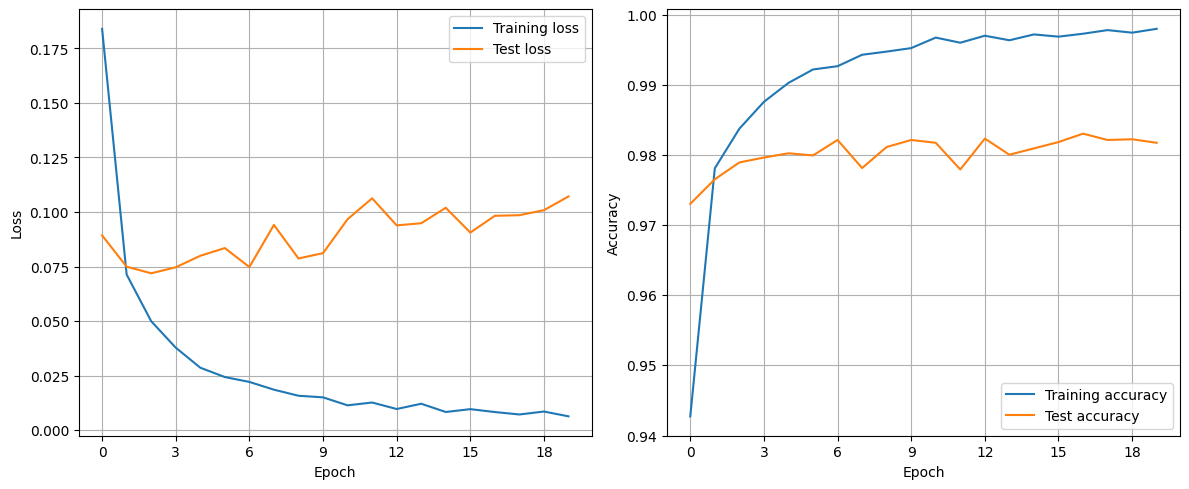

In [5]:
# Model creation
model = M1().to(device)
# Setting up loss function and optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# loss and accuracy value list
loss_keeper = {'train':[], 'test':[]}
accuracy_keeper = {'train': [], 'test': []}

for epoch in range(training_epochs):
    '''
    Training phase
    '''
    train_loss, train_accuracy = train(model, train_loader, optimizer)
    loss_keeper['train'].append(train_loss)
    accuracy_keeper['train'].append(train_accuracy)
    
    '''
    Test phase
    '''
    test_loss, test_accuracy = evaluate(model, test_loader)
    loss_keeper['test'].append(test_loss)
    accuracy_keeper['test'].append(test_accuracy)

    print("Epoch:%2d/%2d.. Training loss: %f.. Test loss: %f.. Test Accuracy: %f" 
          %(epoch + 1, training_epochs, train_loss, test_loss, test_accuracy))
    
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_keeper['train'], label="Training loss")
plt.plot(loss_keeper['test'], label="Test loss")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.subplot(1, 2, 2)
plt.plot(accuracy_keeper['train'], label="Training accuracy")
plt.plot(accuracy_keeper['test'], label="Test accuracy")
plt.legend()
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, training_epochs, step=3))

plt.tight_layout()
plt.show()

torch.save(model, project_root + '/models/M1_model.pth')

In [6]:
print(model)

M1(
  (Conv1): Conv2d(1, 8, kernel_size=(4, 4), stride=(3, 3))
  (Square1): Square()
  (Flatten): Flatten()
  (FC1): Linear(in_features=648, out_features=64, bias=True)
  (Square2): Square()
  (FC2): Linear(in_features=64, out_features=10, bias=True)
)
